## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [ ]:
# Deactivate GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf

In [ ]:
import tensorflow as tf 

#if tf.test.gpu_device_name(): 
    

#    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

#else:

#    print("Please install GPU version of TF")

In [ ]:
# Restrict the GPU usage to required percentage

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# Print the GPU name
tf.test.gpu_device_name()

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

# imagedatagenerator = read images and do data augmentation

In [ ]:
# re-size all the images to this
# for full vgg16 - IMAGE_SIZE = (224, 224, 3)

#for only conv layers only
IMAGE_SIZE = [224, 224]

train_path = r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\train'
valid_path = r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

# vgg16 = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=True)
vgg16 = VGG16(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

# include_top=False - skip the flatten and output layer

In [ ]:
vgg16.layers

In [ ]:
vgg16.summary()

In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False
    
# this will freeze the above layers of vgg16 archtecture 

In [ ]:
  # useful for getting number of output classes
folders = glob(r'cat and dog dataset\dataset\train\*')
folders

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)
x

In [ ]:
vgg16.input
vgg16.output

In [ ]:
# adding output layer after x
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

In [ ]:
test_set = test_datagen.flow_from_directory(r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# model.fit also works
# due to data augmentation used, sometimes it gives error. so we use model.fit_generator.

In [ ]:
# plot the loss
!pip install matplotlib
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
model=load_model('model_vgg16.h5')

In [ ]:
img_data

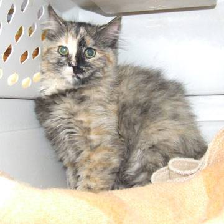

In [4]:
img=image.load_img(r'E:\ineuron\DLCVNLP\deeplearning\CNN\cats-dogs-main\cat and dog dataset\dataset\test\cats\cat.4005.jpg',target_size=(224,224))
img

In [5]:
x=image.img_to_array(img)
x

array([[[226., 228., 227.],
        [253., 255., 254.],
        [222., 224., 223.],
        ...,
        [246., 249., 254.],
        [250., 253., 255.],
        [248., 251., 255.]],

       [[247., 249., 248.],
        [248., 250., 249.],
        [213., 215., 214.],
        ...,
        [243., 246., 251.],
        [242., 245., 250.],
        [237., 240., 245.]],

       [[249., 251., 250.],
        [237., 239., 238.],
        [219., 221., 220.],
        ...,
        [237., 240., 245.],
        [239., 242., 247.],
        [236., 239., 244.]],

       ...,

       [[247., 238., 197.],
        [250., 243., 201.],
        [253., 248., 208.],
        ...,
        [252., 255., 231.],
        [250., 254., 227.],
        [248., 253., 221.]],

       [[255., 245., 205.],
        [255., 243., 203.],
        [255., 250., 211.],
        ...,
        [254., 255., 238.],
        [251., 254., 233.],
        [248., 252., 229.]],

       [[255., 248., 211.],
        [255., 242., 205.],
        [255., 2

In [6]:
x.shape

(224, 224, 3)

In [7]:
x=x/255
x.shape

(224, 224, 3)

In [8]:
import numpy as np
x=np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [9]:
result = model.predict(x)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model/block1_conv1/Conv2D (defined at <ipython-input-9-2405eb5a71e0>:1) ]] [Op:__inference_predict_function_669]

Function call stack:
predict_function


In [ ]:
a=np.argmax(result, axis=1)

In [ ]:
a==1